In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [3]:
# Load dataset
data = pd.read_csv("sales_data_sample.csv", encoding='latin1')
print("Initial shape:", data.shape)
print(data.head())

Initial shape: (2823, 25)
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue

In [5]:
# Data preprocessing — selecting numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64']).copy()
numeric_data = numeric_data.dropna()

In [7]:
print("\nNumeric columns used for clustering:")
print(numeric_data.columns.tolist())


Numeric columns used for clustering:
['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'MSRP']


In [9]:
# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

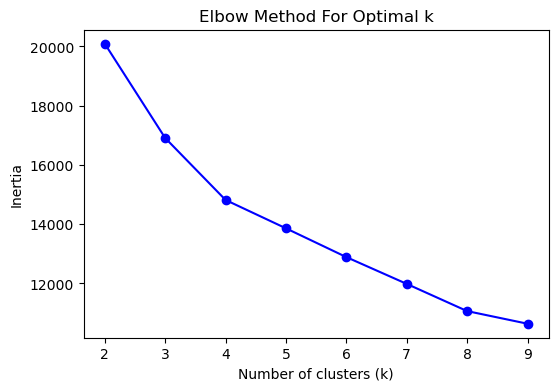

In [11]:
# K-MEANS CLUSTERING

# Finding optimal number of clusters using Elbow Method
inertia = []
K = range(2, 10)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_data)
    inertia.append(model.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [13]:
# Choose k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
numeric_data['Cluster'] = clusters

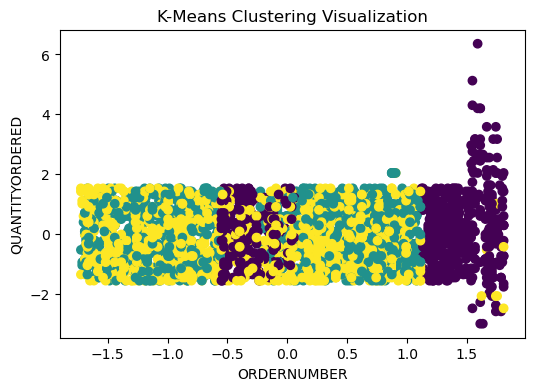

In [15]:
# Visualize first two features
plt.figure(figsize=(6,4))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering Visualization')
plt.xlabel(numeric_data.columns[0])
plt.ylabel(numeric_data.columns[1])
plt.show()

In [17]:
# Cluster summary
cluster_summary = numeric_data.groupby('Cluster').mean()
print("\nCluster summary:")
print(cluster_summary)


Cluster summary:
          ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER  \
Cluster                                                              
0        10333.005457        36.600273  86.857326         6.042292   
1        10234.437025        35.477599  97.894987         6.530008   
2        10230.373760        33.372657  62.504829         6.725469   

               SALES    QTR_ID  MONTH_ID      YEAR_ID        MSRP  
Cluster                                                            
0        3807.840723  1.328786  2.862210  2004.642565  103.562074  
1        4539.230541  3.330516  8.943364  2003.503804  125.788673  
2        2063.475050  3.040794  8.097023  2003.552370   65.712238  
